In [1]:
#Python 3.7.2
#Import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%config IPCompleter.greedy=True

In [2]:
#Read in CSV
df = pd.read_csv(r"C:\Users\Aurian\Documents\SMU_LAB_ML1\NewYorkCityCrimes2015\Mini_Lab_Individual_Files\Brian\Data\Training_and_Test_Set.csv")
df_holdout = pd.read_csv(r"C:\Users\Aurian\Documents\SMU_LAB_ML1\NewYorkCityCrimes2015\Mini_Lab_Individual_Files\Brian\Data\Hold_Out_Set.csv")

In [3]:
#Check dimensions
print(df.shape)
print(df_holdout.shape)

#Check data types
print(df.info())

#Check Head
df.head()

(528873, 18)
(58764, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528873 entries, 0 to 528872
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   JURIS_DESC         528873 non-null  object 
 1   BORO_NM            528873 non-null  object 
 2   ADDR_PCT_CD        528873 non-null  float64
 3   LOC_OF_OCCUR_DESC  528873 non-null  object 
 4   PREM_TYP_DESC      528873 non-null  object 
 5   Day_Name           528873 non-null  object 
 6   Duration           528873 non-null  float64
 7   Duration_to_PD     528873 non-null  float64
 8   Month              528873 non-null  object 
 9   Day                528873 non-null  float64
 10  Year               528873 non-null  float64
 11  Duration_lbl       528873 non-null  object 
 12  Season             528873 non-null  object 
 13  Daytime            528873 non-null  object 
 14  GeoCell            528873 non-null  float64
 15  GeoCell_X          528873 

,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Day_Name,Duration,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,y
0,N.Y. POLICE DEPT,STATEN ISLAND,120.0,INSIDE,COMMERCIAL BUILDING,Friday,3.0,0.0,September,5.0,2014.0,Short,Fall,Morning,23.0,3.0,3.0,0
1,N.Y. POLICE DEPT,STATEN ISLAND,121.0,INSIDE,RESIDENCE-HOUSE,Sunday,1.0,0.0,December,27.0,2015.0,Short,Winter,Day,23.0,3.0,3.0,1
2,N.Y. POLICE DEPT,BRONX,43.0,INSIDE,RESIDENCE - APT. HOUSE,Sunday,14.0,171.0,September,1.0,2013.0,Medium,Fall,Night,78.0,8.0,8.0,0
3,N.Y. POLICE DEPT,BROOKLYN,75.0,INSIDE,RESIDENCE-HOUSE,Friday,6.0,28.0,October,10.0,2014.0,Short,Fall,Day,47.0,7.0,5.0,0
4,N.Y. POLICE DEPT,MANHATTAN,6.0,FRONT OF,STREET,Sunday,1.0,0.0,September,28.0,2014.0,Short,Fall,Early Morning,55.0,5.0,6.0,0


In [4]:
#Check out target var
print(df.y.value_counts())
print(df_holdout.y.value_counts())

0    365333
1    163540
Name: y, dtype: int64
0    40568
1    18196
Name: y, dtype: int64


In [5]:
#Separate out cont. and cat. columns

cat_col = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
num_col = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

In [6]:
#Create dummies for Train/Test data set
for var in cat_col:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    
cat_col = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_col]

#Create new df with new vars
newdf = df[to_keep]
newdf.columns.values

array(['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell',
       'GeoCell_X', 'GeoCell_Y', 'y', 'JURIS_DESC_AMTRACK',
       'JURIS_DESC_DEPT OF CORRECTIONS', 'JURIS_DESC_HEALTH & HOSP CORP',
       'JURIS_DESC_LONG ISLAND RAILRD', 'JURIS_DESC_METRO NORTH',
       'JURIS_DESC_N.Y. HOUSING POLICE', 'JURIS_DESC_N.Y. POLICE DEPT',
       'JURIS_DESC_N.Y. STATE PARKS', 'JURIS_DESC_N.Y. STATE POLICE',
       'JURIS_DESC_N.Y. TRANSIT POLICE',
       'JURIS_DESC_NEW YORK CITY SHERIFF OFFICE', 'JURIS_DESC_NYC PARKS',
       'JURIS_DESC_NYS DEPT TAX AND FINANCE', 'JURIS_DESC_OTHER',
       'JURIS_DESC_POLICE DEPT NYC', 'JURIS_DESC_PORT AUTHORITY',
       'JURIS_DESC_STATN IS RAPID TRANS',
       'JURIS_DESC_TRI-BORO BRDG TUNNL', 'JURIS_DESC_U.S. PARK POLICE',
       'BORO_NM_BRONX', 'BORO_NM_BROOKLYN', 'BORO_NM_MANHATTAN',
       'BORO_NM_QUEENS', 'BORO_NM_STATEN ISLAND',
       'LOC_OF_OCCUR_DESC_FRONT OF', 'LOC_OF_OCCUR_DESC_INSIDE',
       'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'LOC_OF_OCCUR_

In [7]:
### Create same manipulation on holdout set
#Separate out cont. and cat. columns
cat_col = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
num_col = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

#Create dummies for Train/Test data set
for var in cat_col:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_holdout[var], prefix=var)
    df_holdout1=df_holdout.join(cat_list)
    df_holdout=df_holdout1
    
cat_col = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
data_vars=df_holdout.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_col]

#Create new df with new vars
newdf_holdout = df_holdout[to_keep]
newdf_holdout.columns.values

array(['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell',
       'GeoCell_X', 'GeoCell_Y', 'y', 'JURIS_DESC_AMTRACK',
       'JURIS_DESC_DEPT OF CORRECTIONS', 'JURIS_DESC_HEALTH & HOSP CORP',
       'JURIS_DESC_LONG ISLAND RAILRD', 'JURIS_DESC_METRO NORTH',
       'JURIS_DESC_N.Y. HOUSING POLICE', 'JURIS_DESC_N.Y. POLICE DEPT',
       'JURIS_DESC_N.Y. STATE PARKS', 'JURIS_DESC_N.Y. STATE POLICE',
       'JURIS_DESC_NEW YORK CITY SHERIFF OFFICE', 'JURIS_DESC_NYC PARKS',
       'JURIS_DESC_NYS DEPT TAX AND FINANCE', 'JURIS_DESC_OTHER',
       'JURIS_DESC_POLICE DEPT NYC', 'JURIS_DESC_PORT AUTHORITY',
       'JURIS_DESC_TRI-BORO BRDG TUNNL', 'JURIS_DESC_U.S. PARK POLICE',
       'BORO_NM_BRONX', 'BORO_NM_BROOKLYN', 'BORO_NM_MANHATTAN',
       'BORO_NM_QUEENS', 'BORO_NM_STATEN ISLAND',
       'LOC_OF_OCCUR_DESC_FRONT OF', 'LOC_OF_OCCUR_DESC_INSIDE',
       'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'LOC_OF_OCCUR_DESC_REAR OF',
       'ADDR_PCT_CD_1.0', 'ADDR_PCT_CD_5.0', 'ADDR_PCT_CD_6.0',
    

In [8]:
#Random Forest Feature Selection
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Create X and y
X = newdf.drop(['y'], axis = 1)
y = newdf[['y']]

#Create splits 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\Aurian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
## Testing out selectfrommodel class - most likely will not move forward since syntax is less intuitive vs sklearn modules
#Set RF Class
feats = SelectFromModel(RandomForestClassifier(n_estimators = 100))
feats.fit(X_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier())

In [10]:
#Which features are most important
feats.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [11]:
#List of features that are most important
selected_feats= X_train.columns[(feats.get_support())]
print(len(selected_feats))
print(selected_feats)

#Store columns for later use
good_cols = ['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell', 'GeoCell_X',
       'GeoCell_Y', 'BORO_NM_MANHATTAN', 'LOC_OF_OCCUR_DESC_FRONT OF',
       'LOC_OF_OCCUR_DESC_INSIDE', 'PREM_TYP_DESC_CHAIN STORE',
       'PREM_TYP_DESC_DEPARTMENT STORE',
       'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 'PREM_TYP_DESC_RESIDENCE-HOUSE',
       'PREM_TYP_DESC_STREET', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Duration_lbl_Long',
       'Duration_lbl_Medium', 'Duration_lbl_Short', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Daytime_Day',
       'Daytime_Early Morning', 'Daytime_Evening', 'Daytime_Late Night',
       'Daytime_Morning', 'Daytime_Night']

46
Index(['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell', 'GeoCell_X',
       'GeoCell_Y', 'LOC_OF_OCCUR_DESC_FRONT OF', 'LOC_OF_OCCUR_DESC_INSIDE',
       'PREM_TYP_DESC_CHAIN STORE', 'PREM_TYP_DESC_DEPARTMENT STORE',
       'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 'PREM_TYP_DESC_RESIDENCE-HOUSE',
       'PREM_TYP_DESC_STREET', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Duration_lbl_Long',
       'Duration_lbl_Medium', 'Duration_lbl_Short', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Daytime_Day',
       'Daytime_Early Morning', 'Daytime_Evening', 'Daytime_Late Night',
       'Daytime_Morning', 'Daytime_Night'],
      dtype='o

In [12]:
#Set the right columns
X_train=X_train[good_cols]

X_test = X_test[good_cols]

X_holdout=newdf_holdout[good_cols]
y_holdout=newdf_holdout[['y']]

In [13]:
#Set RF Class
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=50)

In [14]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

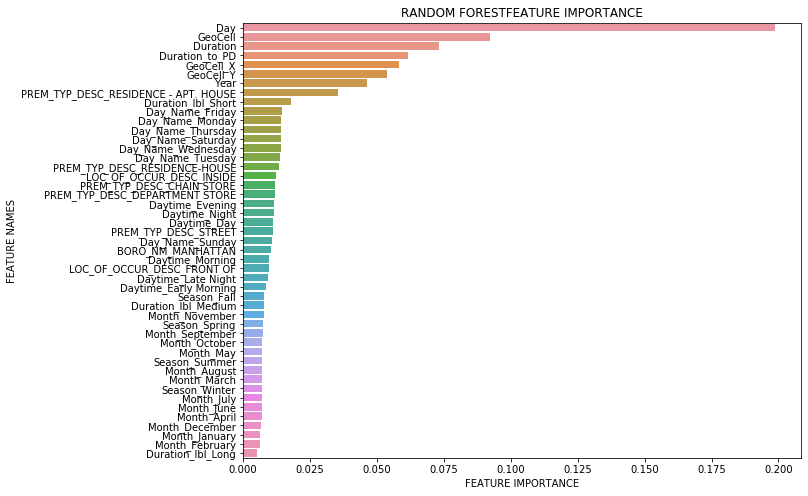

In [15]:
#Plot feature importance by GINI
plot_feature_importance(rf.feature_importances_,X_train.columns,'RANDOM FOREST')

In [16]:
#Check out actual feature names associated with their gini score
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train.columns), 
             reverse=True))

#Optimal cut off is at 0.0052 for this RF Model

Features sorted by their score:
[(0.1986, 'Day'), (0.0922, 'GeoCell'), (0.0731, 'Duration'), (0.0614, 'Duration_to_PD'), (0.0584, 'GeoCell_X'), (0.0537, 'GeoCell_Y'), (0.0462, 'Year'), (0.0356, 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE'), (0.018, 'Duration_lbl_Short'), (0.0147, 'Day_Name_Friday'), (0.0143, 'Day_Name_Thursday'), (0.0143, 'Day_Name_Monday'), (0.0142, 'Day_Name_Saturday'), (0.0141, 'Day_Name_Wednesday'), (0.0136, 'Day_Name_Tuesday'), (0.0132, 'PREM_TYP_DESC_RESIDENCE-HOUSE'), (0.0122, 'LOC_OF_OCCUR_DESC_INSIDE'), (0.0118, 'PREM_TYP_DESC_DEPARTMENT STORE'), (0.0118, 'PREM_TYP_DESC_CHAIN STORE'), (0.0115, 'Daytime_Evening'), (0.0114, 'Daytime_Night'), (0.0113, 'Daytime_Day'), (0.0111, 'PREM_TYP_DESC_STREET'), (0.0109, 'Day_Name_Sunday'), (0.0103, 'BORO_NM_MANHATTAN'), (0.0096, 'Daytime_Morning'), (0.0095, 'LOC_OF_OCCUR_DESC_FRONT OF'), (0.0092, 'Daytime_Late Night'), (0.0083, 'Daytime_Early Morning'), (0.0078, 'Season_Fall'), (0.0076, 'Month_November'), (0.0076, 'Duration_lbl_M

In [17]:
#Get feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

#Assort my importance > 0.0048
df_top_features = importances[importances['Gini-importance']>.005]
df_top_features['feature'] = df_top_features.index
top_features = df_top_features['feature'].tolist()

df_top_features.sort_values(by='Gini-importance',ascending=False)

,Gini-importance,feature
Day,0.198568,Day
GeoCell,0.092163,GeoCell
Duration,0.073122,Duration
Duration_to_PD,0.061427,Duration_to_PD
GeoCell_X,0.058362,GeoCell_X
GeoCell_Y,0.053692,GeoCell_Y
Year,0.046170,Year
PREM_TYP_DESC_RESIDENCE - APT. HOUSE,0.035561,PREM_TYP_DESC_RESIDENCE - APT. HOUSE
Duration_lbl_Short,0.018005,Duration_lbl_Short
Day_Name_Friday,0.014680,Day_Name_Friday


In [18]:
#Random Forest Model
from sklearn.metrics import *

#Create predictions for test and holdout
y_pred = rf.predict(X_test)
y_hold_pred = rf.predict(X_holdout)

#Classification matrix
print('Confusion Matrix for Train/Test')
print('--------------------------------')
print(classification_report(y_test,y_pred))
print('Confusion Matrix for Holdout')
print('--------------------------------')
print(classification_report(y_holdout,y_hold_pred))

Confusion Matrix for Train/Test
--------------------------------
              precision    recall  f1-score   support

           0       0.77      0.84      0.80     72942
           1       0.55      0.43      0.48     32833

    accuracy                           0.72    105775
   macro avg       0.66      0.64      0.64    105775
weighted avg       0.70      0.72      0.70    105775

Confusion Matrix for Holdout
--------------------------------
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     40568
           1       0.56      0.43      0.48     18196

    accuracy                           0.72     58764
   macro avg       0.66      0.64      0.64     58764
weighted avg       0.70      0.72      0.71     58764



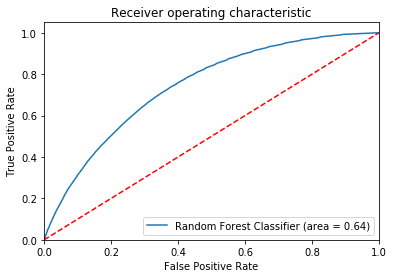

In [19]:
#ROC Curve for Random Forest
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [44]:
#Logistic Reg using stats model API
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.528526
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               423098
Model:                          Logit   Df Residuals:                   423059
Method:                           MLE   Df Model:                           38
Date:                Sun, 11 Oct 2020   Pseudo R-squ.:                  0.1451
Time:                        18:42:54   Log-Likelihood:            -2.2362e+05
converged:                       True   LL-Null:                   -2.6158e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -43.2403   1.73e

C:\Users\Aurian\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Aurian\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [62]:
#Create predictions for test and holdout
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)

#Columns
X_train=X_train[good_cols]
X_holdout=newdf_holdout[good_cols]
y_holdout=newdf_holdout[['y']]

#FIT
logreg.fit(X_train, y_train.values.ravel())

#Create predictions for test and holdout
y_pred = logreg.predict(X_test)
y_hold_pred = logreg.predict(X_holdout)

#Classification matrix
print('Confusion Matrix for Train/Test')
print('--------------------------------')
print(classification_report(y_test,y_pred))
print('Confusion Matrix for Holdout')
print('--------------------------------')
print(classification_report(y_holdout,y_hold_pred))

C:\Users\Aurian\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix for Train/Test
--------------------------------
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     72942
           1       0.58      0.40      0.47     32833

    accuracy                           0.73    105775
   macro avg       0.67      0.64      0.64    105775
weighted avg       0.71      0.73      0.71    105775

Confusion Matrix for Holdout
--------------------------------
              precision    recall  f1-score   support

           0       0.76      0.88      0.82     40568
           1       0.59      0.40      0.48     18196

    accuracy                           0.73     58764
   macro avg       0.68      0.64      0.65     58764
weighted avg       0.71      0.73      0.71     58764



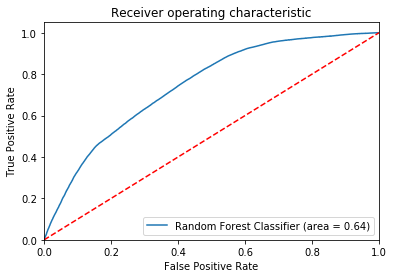

In [63]:
#ROC Curve

lm_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % lm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()